# Hands On: Introduction to Large Language Models (LLMs)

[Sam Foreman](https://samforeman.me)
(\[[ALCF](https://alcf.anl.gov/about/people/sam-foreman)\](<https://alcf.anl.gov/about/people/sam-foreman>))  
2025-07-23

<a href="https://colab.research.google.com/github/saforem2/intro-hpc-bootcamp-2025/blob/main/02-llms/01-hands-on-llms/index.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

> **Authors**
>
> Content in this notebook is modified from content originally written
> by:
>
> -   Archit Vasan, Huihuo Zheng, Marieme Ngom, Bethany Lusch, Taylor
>     Childers, Venkat Vishwanath
>
> Inspiration from the blog posts “The Illustrated Transformer” and “The
> Illustrated GPT2” by Jay Alammar, highly recommended reading.

## Outline

Although the name “language models” is derived from Natural Language
Processing, the models used in these approaches can be applied to
diverse scientific applications as illustrated below.

During this session I will cover:

1.  Scientific applications for language models
2.  General overview of Transformers
3.  Tokenization
4.  Model Architecture
5.  Pipeline using HuggingFace
6.  Model loading

## Modeling Sequential Data

Sequences are variable-length lists with data in subsequent iterations
that depends on previous iterations (or tokens).

Mathematically:

A sequence is a list of tokens:

$$T = [T_1, T_2, T_3,...,T_N]$$

where each token within the list depends on the others with a particular
probability:

$$P(t_N | t_{N-1}, ..., t_3, t_2, t_1)$$

The purpose of sequential modeling is to learn these probabilities for
possible tokens in a distribution to perform various tasks including:

-   Sequence generation based on a prompt
-   Language translation (e.g. English –\> French)
-   Property prediction (predicting a property based on an entire
    sequence)
-   Identifying mistakes or missing elements in sequential data

## Scientific sequential data modeling examples

### Nucleic acid sequences + genomic data

<figure id="fig-RNA-codons">
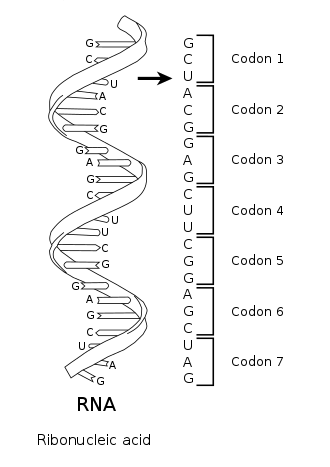
<figcaption>Figure 1: RNA Codons</figcaption>
</figure>

Nucleic acid sequences can be used to predict translation of proteins,
mutations, and gene expression levels.

Here is an image of GenSLM. This is a language model developed by
Argonne researchers that can model genomic information in a single
model. It was shown to model the evolution of SARS-COV2 without
expensive experiments.

<figure id="fig-genslm">
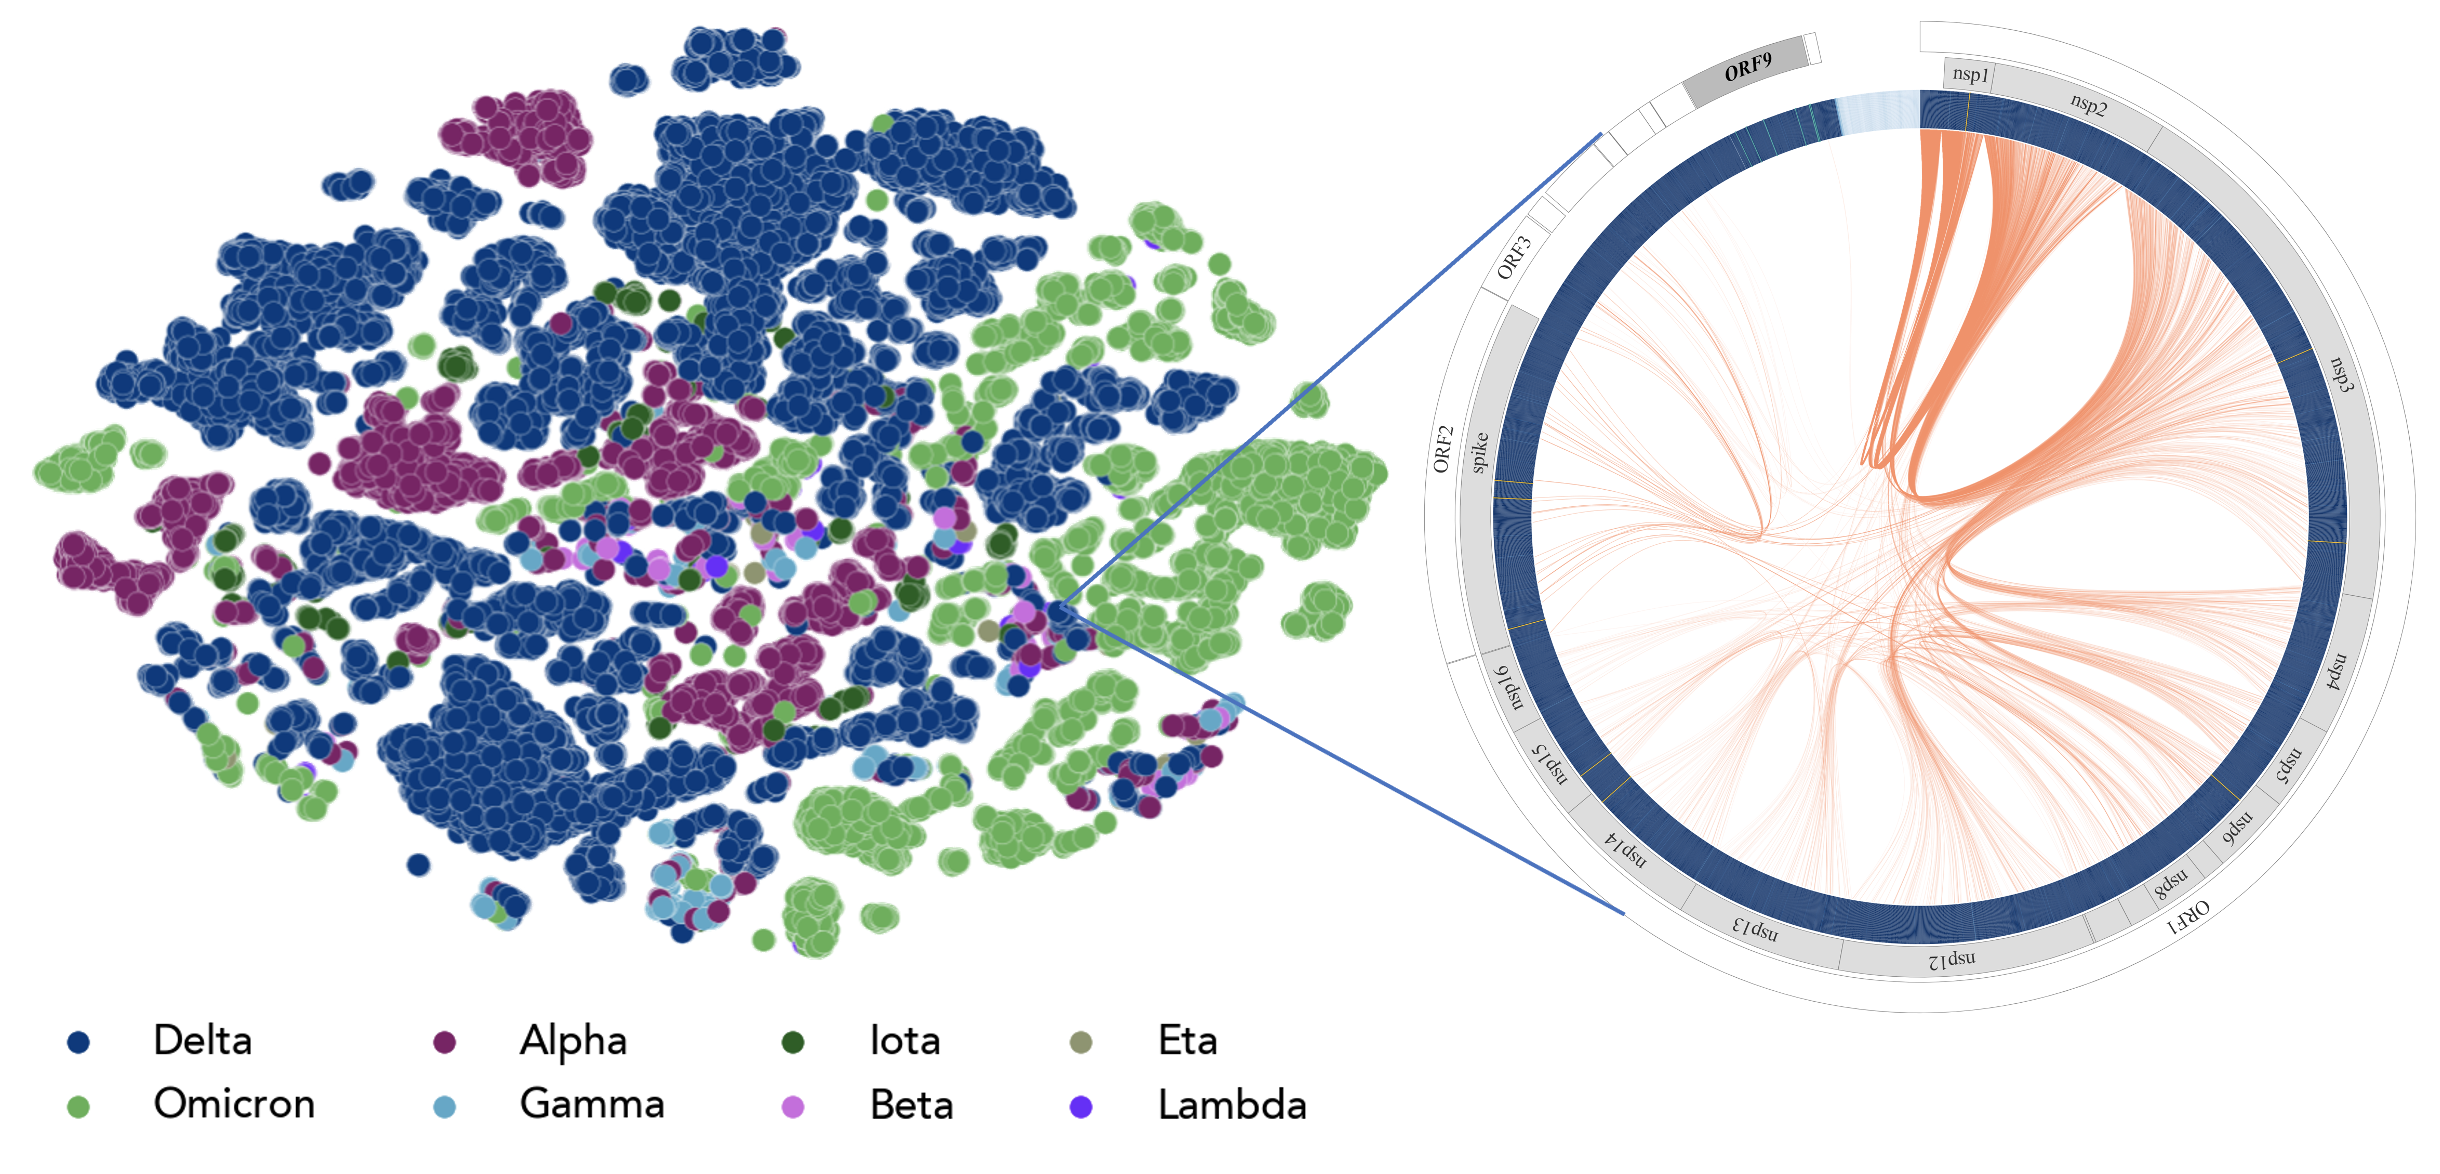
<figcaption>Figure 2: Genomic Scale Language Models (GenSLM) <a
href="https://www.biorxiv.org/content/10.1101/2022.10.10.511571v1">Zvyagin
et. al 2022. BioRXiv</a></figcaption>
</figure>

### Protein sequences

Protein sequences can be used to predict folding structure,
protein-protein interactions, chemical/binding properties, protein
function and many more properties.

<figure id="fig-protein-structure">
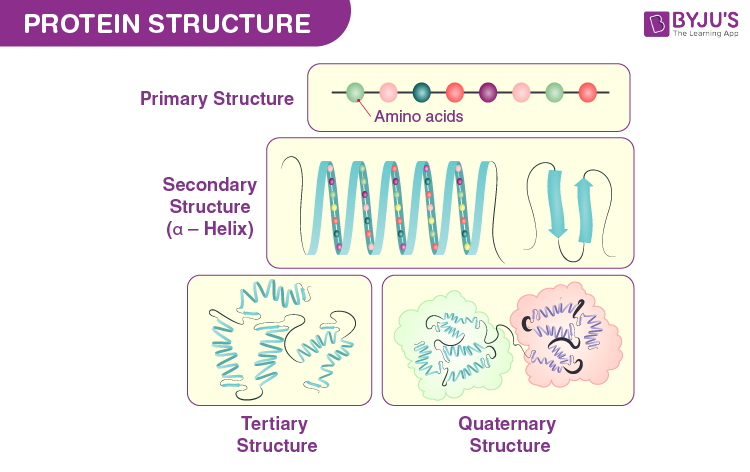
<figcaption>Figure 3: Protein Structure</figcaption>
</figure>

<figure id="fig-esmfold">
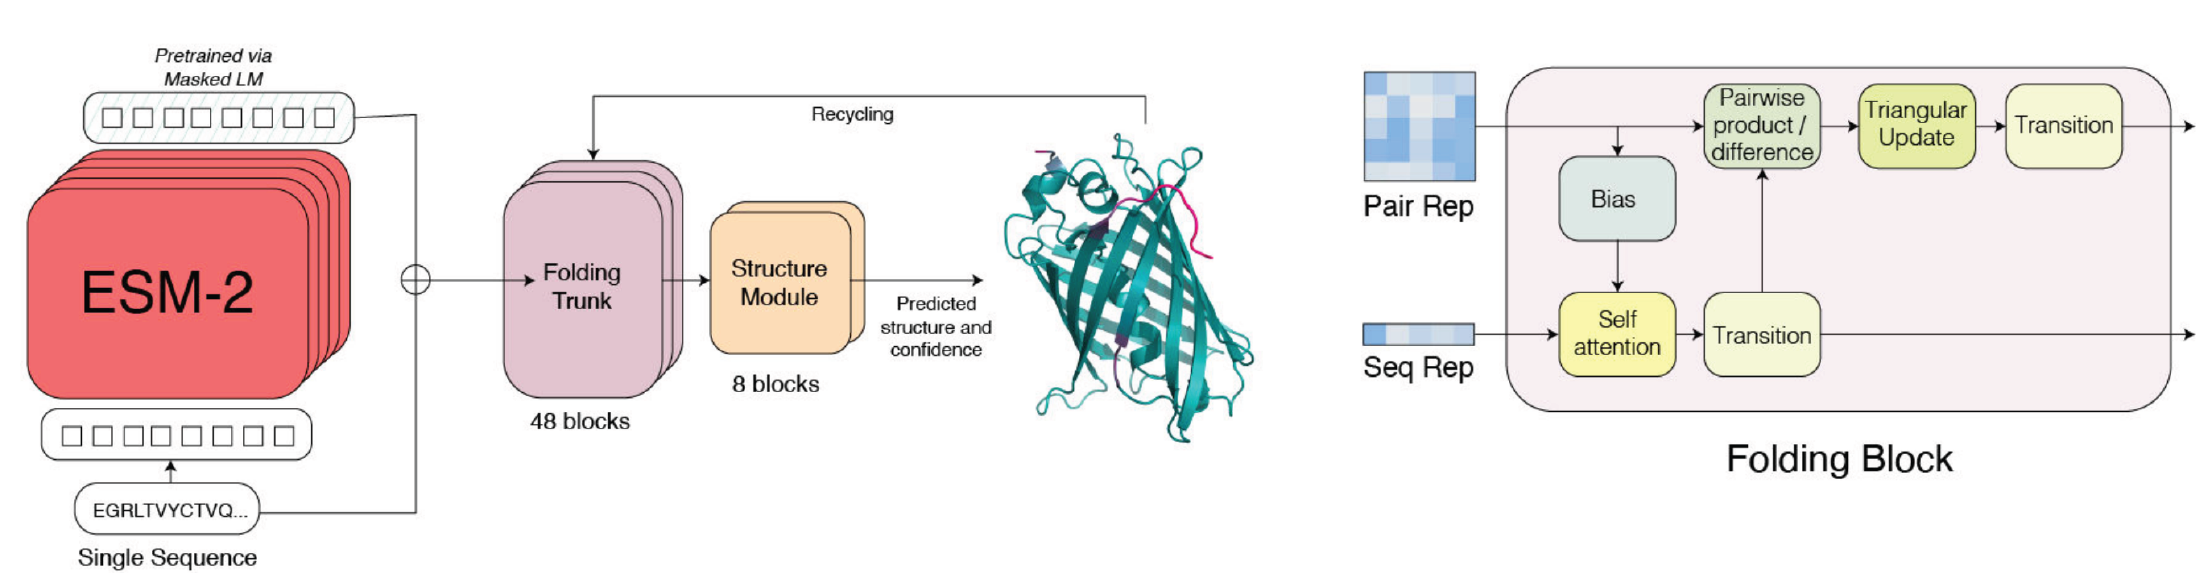
<figcaption>Figure 4: ESMFold <a
href="https://www.science.org/doi/10.1126/science.ade2574">Lin et.
al. 2023. Science</a></figcaption>
</figure>

### Other applications

-   Biomedical text
-   SMILES strings
-   Weather predictions
-   Interfacing with simulations such as molecular dynamics simulation

## Overview of Language models

We will now briefly talk about the progression of language models.

### Transformers

The most common LMs base their design on the Transformer architecture
that was introduced in 2017 in the “Attention is all you need” paper.

<figure id="fig-attention-is-all-you-need">
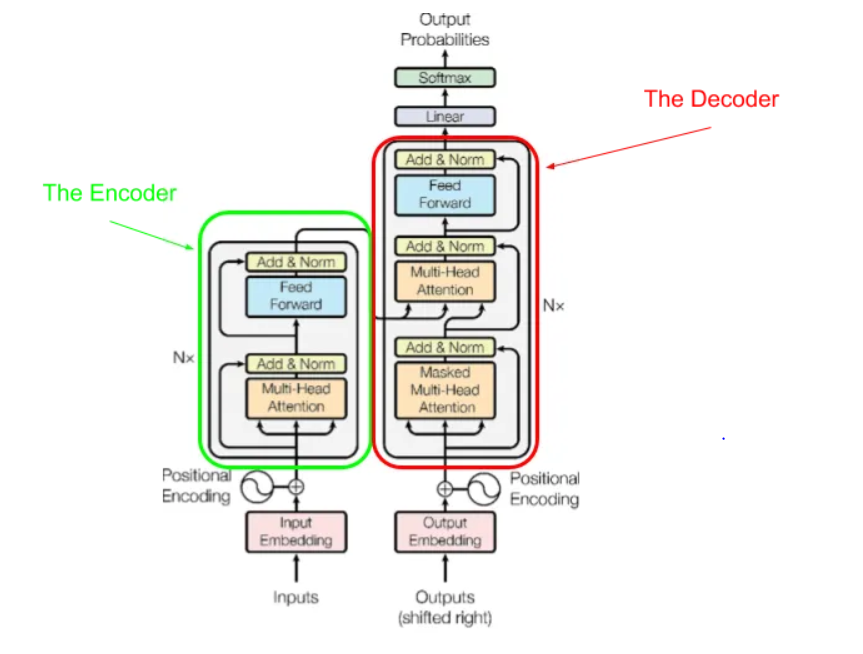
<figcaption>Figure 5: Attention is all you need <a
href="https://arxiv.org/pdf/1706.03762">Vaswani 2017. Advances in Neural
Information Processing Systems</a></figcaption>
</figure>

Since then a multitude of LLM architectures have been designed.

<figure id="fig-ch1-transformers">

<figcaption>Figure 6: Transformers, chronologically</figcaption>
</figure>

[HuggingFace NLP
Course](https://huggingface.co/learn/nlp-course/chapter1/4)

## Coding example of LLMs in action!

Let’s look at an example of running inference with a LLM as a block box
to generate text given a prompt and we will also initiate a training
loop for an LLM

Here, we will use the `transformers` library which is as part of
HuggingFace, a repository of different models, tokenizers and
information on how to apply these models

> **🦜 Stochastic Parrots**
>
> **Warning**: *Large Language Models are only as good as their training
> data*.
>
> They have no ethics, judgement, or editing ability.
>
> We will be using some pretrained models from Hugging Face which used
> wide samples of internet hosted text.
>
> The datasets have not been strictly filtered to restrict all malign
> content so the generated text may be surprisingly dark or
> questionable.
>
> They do not reflect our core values and are only used for
> demonstration purposes.

🏃‍♂️ Running @ ALCF

-   If running this notebook on any of the ALCF machines, be sure to:

    ``` python
    import os
    os.environ["HTTP_PROXY"]="proxy.alcf.anl.gov:3128"
    os.environ["HTTPS_PROXY"]="proxy.alcf.anl.gov:3128"
    os.environ["http_proxy"]="proxy.alcf.anl.gov:3128"
    os.environ["https_proxy"]="proxy.alcf.anl.gov:3128"
    os.environ["ftp_proxy"]="proxy.alcf.anl.gov:3128"
    ```

## 🧑‍💻 Hands On

In [1]:
#!pip install transformers
#!pip install pandas
#!pip install torch

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import ezpz
import ambivalent
import matplotlib.pyplot as plt
import seaborn as sns
from rich import print

plt.style.use(ambivalent.STYLES["ambivalent"])
sns.set_context("notebook")
plt.rcParams["figure.figsize"] = [6.4, 4.8]

In [4]:
from transformers import AutoConfig, AutoModelForCausalLM, AutoTokenizer, pipeline

input_text = "What is the ALCF?"
generator = pipeline("text-generation", model="gpt2")

pipe = pipeline("text-generation", model="meta-llama/Llama-3.2-3B")
output = generator(input_text, max_length=20, num_return_sequences=2)

In [5]:
import rich

for i, response in enumerate([i["generated_text"] for i in output]):
    # print(f"Response {i}:\n\t{' '.join(response.split('\n'))}")
    # rich.print(f"Response {i}:\n\t{' '.join(response.split('\n'))}")
    print(f"Response {i}:\n\t{' '.join(response.split('\n'))}")
# print("\n".join([f"Response {i}: {c}"] for i, c in enumerate(outputs)))

Response 0 :
 What is the ALCF? The ALCF is a process to determine the level of calcium contained in the blood. This 
level is determined by measuring the amount of calcium present in the blood: The amount of calcium present in the 
blood is measured in milligrams per deciliter ( mg/dL ) or milliliters per milliliter. ( mg/dL ) or milliliters per 
milliliter. The number of milliliters per milliliter is determined by calculating the square root of the number of 
milliliters per milliliter. is determined by calculating the square root of the number of milliliters per 
milliliter. The number of milliliters per milliliter is determined by calculating the square root of the number of 
milliliters per milliliter. The amount of calcium in the blood is measured in milligrams per liter ( mg/dL ) or 
milliliters per liter. is measured in milligrams per liter ( mg/dL ) or milliliters per liter. The number of 
milliliters per milliliter is determined by calculating the square root of the number of milliliters per 
milliliter. The amount of calcium in the blood is measured in milligrams per

Response 1 :
 What is the ALCF? The ALCF is intended to help prevent a car's failure by preventing mechanical failure 
and by preventing excessive power loss. The ALCF is developed by the ALCF Technology Division of the UCI, and the 
ALCF is currently used by the FIA. How much does the ALCF cost? The ALCF costs € 90 , 000 . How much does the ALCF 
service an entire season? The ALCF costs € 50 , 000 . How much does the ALCF run in a race? The ALCF runs in a race.
What is the ALCF's fuel capacity? The ALCF's fuel capacity is measured in BTUs. What is the ALCF's road capacity?
The ALCF's road capacity is measured in BTUs. The ALCF's fuel efficiency will vary depending on the type of car. 
What is the ALCF's fuel economy? The ALCF's fuel economy will vary depending on the type of car. What is the 
ALCF's fuel efficiency rating? The ALCF's fuel efficiency

## What’s going on under the hood?

There are two components that are “black-boxes” here:

1.  The method for tokenization
2.  The model that generates novel text.

## Tokenization and embedding of sequential data

Humans can inherently understand language data because they previously
learned phonetic sounds.

Machines don’t have phonetic knowledge so they need to be told how to
break text into standard units to process it.

They use a system called “tokenization”, where sequences of text are
broken into smaller parts, or “tokens”, and then fed as input.

<figure id="fig-ai-science-local">
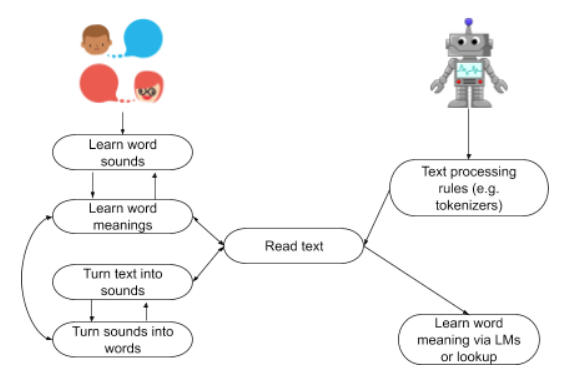
<figcaption>Figure 7</figcaption>
</figure>

Tokenization is a data preprocessing step which transforms the raw text
data into a format suitable for machine learning models. Tokenizers
break down raw text into smaller units called tokens. These tokens are
what is fed into the language models. Based on the type and
configuration of the tokenizer, these tokens can be words, subwords, or
characters.

Types of tokenizers:

1.  Character Tokenizers: Split text into individual characters.
2.  Word Tokenizers: Split text into words based on whitespace or
    punctuation.
3.  Subword Tokenizers: Split text into subword units, such as morphemes
    or character n-grams. Common subword tokenization algorithms
    include:
    1.  Byte-Pair Encoding (BPE),
    2.  SentencePiece,
    3.  WordPiece.

<figure id="fig-tokenization-image">
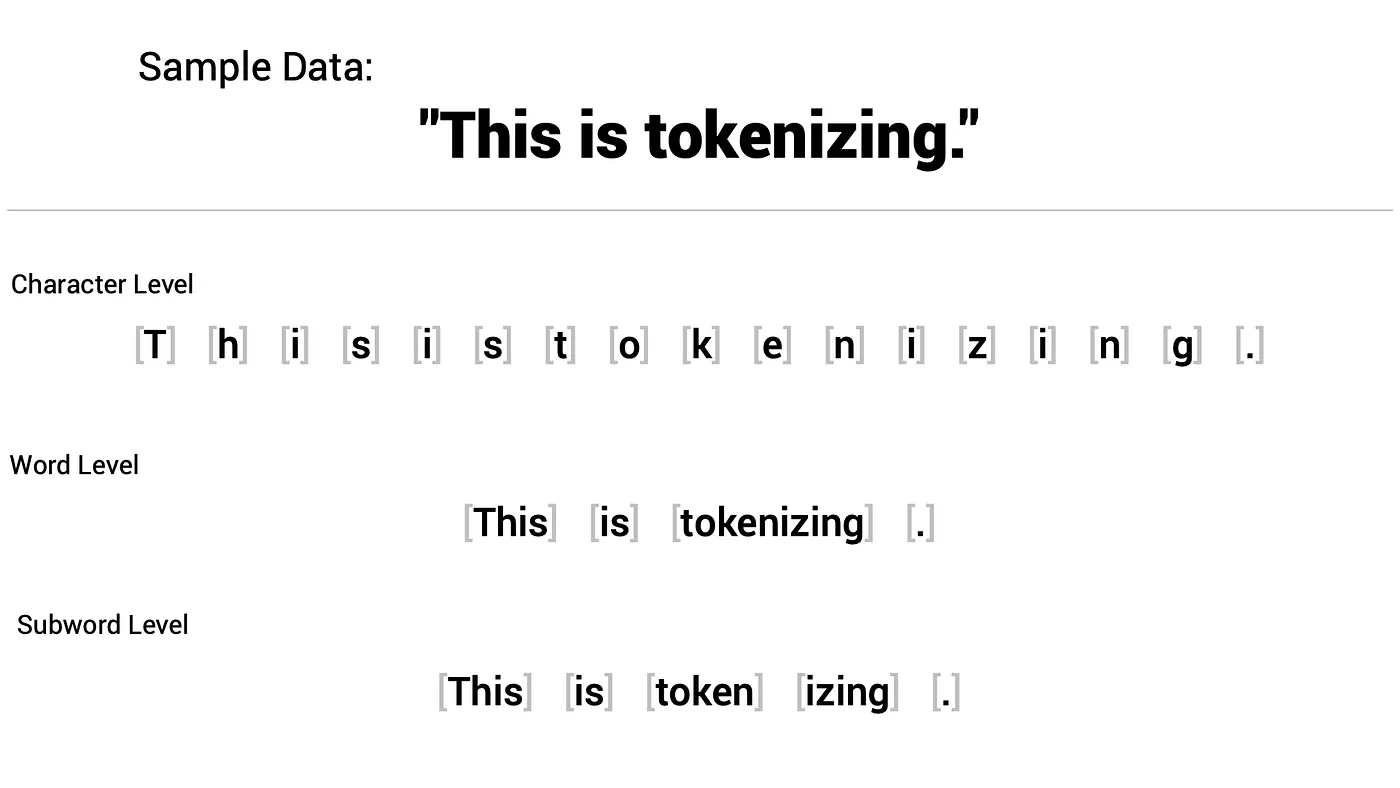
<figcaption>Figure 8</figcaption>
</figure>

[nlpiation](https://nlpiation.medium.com/how-to-use-huggingfaces-transformers-pre-trained-tokenizers-e029e8d6d1fa)

### Example of tokenization

Let’s look at an example of tokenization using byte-pair encoding.

In [6]:
from transformers import AutoTokenizer

def tokenization_summary(tokenizer, sequence):
    # get the vocabulary
    vocab = tokenizer.vocab
    # Number of entries to print
    n = 10
    # print subset of the vocabulary
    print("Subset of tokenizer.vocab:")
    for i, (token, index) in enumerate(tokenizer.vocab.items()):
        print(f"{token}: {index}")
        if i >= n - 1:
            break
    print(f"Vocab size of the tokenizer = {len(vocab)}")
    print("------------------------------------------")
    # .tokenize chunks the existing sequence into different tokens based on the rules and vocab of the tokenizer.
    tokens = tokenizer.tokenize(sequence)
    print(f"Tokens : {tokens}")
    print("------------------------------------------")

    # .convert_tokens_to_ids or .encode or .tokenize converts the tokens to their corresponding numerical representation.
    #  .convert_tokens_to_ids has a 1-1 mapping between tokens and numerical representation
    # ids = tokenizer.convert_tokens_to_ids(tokens)
    # print("encoded Ids: ", ids)

    # .encode also adds additional information like Start of sequence tokens and End of sequene
    print(f"tokenized sequence : {tokenizer.encode(sequence)}")

    # .tokenizer has additional information about attention_mask.
    # encode = tokenizer(sequence)
    # print("Encode sequence : ", encode)
    # print("------------------------------------------")

    # .decode decodes the ids to raw text
    ids = tokenizer.convert_tokens_to_ids(tokens)
    decode = tokenizer.decode(ids)
    print(f"Decode sequence {decode}")


tokenizer_1 = AutoTokenizer.from_pretrained(
    "gpt2"
)  # GPT-2 uses "Byte-Pair Encoding (BPE)"

sequence = "Counselor, please adjust your Zoom filter to appear as a human, rather than as a cat"

tokenization_summary(tokenizer_1, sequence)

Subset of tokenizer.vocab:

ĠFestival: 11117

Ġsubscribers: 18327

Ġunused: 21958

Ó: 143

ouble: 15270

APTER: 29485

ĠMining: 29269

ĠLip: 24701

ĠWrestle: 41137

ğ: 219

Vocab size of the tokenizer = 50257

------------------------------------------

Tokens : [ 'Coun' , 'sel' , 'or' , ',' , 'Ġplease' , 'Ġadjust' , 'Ġyour' , 'ĠZoom' , 'Ġfilter' , 'Ġto' , 'Ġappear' , 'Ġas' , 
 'Ġa' , 'Ġhuman' , ',' , 'Ġrather' , 'Ġthan' , 'Ġas' , 'Ġa' , 'Ġcat' ]

------------------------------------------

tokenized sequence : [ 31053 , 741 , 273 , 11 , 3387 , 4532 , 534 , 40305 , 8106 , 284 , 1656 , 355 , 257 , 1692 , 11 , 2138 , 621 , 
 355 , 257 , 3797 ]

Decode sequence Counselor, please adjust your Zoom filter to appear as a human, rather than as a cat

### Token embedding:

Words are turned into vectors based on their location within a
vocabulary.

The strategy of choice for learning language structure from tokenized
text is to find a clever way to map each token into a moderate-dimension
vector space, adjusting the mapping so that

Similar, or associated tokens take up residence nearby each other, and
different regions of the space correspond to different position in the
sequence. Such a mapping from token ID to a point in a vector space is
called a token embedding. The dimension of the vector space is often
high (e.g. 1024-dimensional), but much smaller than the vocabulary size
(30,000–500,000).

Various approaches have been attempted for generating such embeddings,
including static algorithms that operate on a corpus of tokenized data
as preprocessors for NLP tasks. Transformers, however, adjust their
embeddings during training.

## Transformer Model Architecture

Now let’s look at the base elements that make up a Transformer by
dissecting the popular GPT2 model

In [7]:
from transformers import GPT2LMHeadModel, GPT2Tokenizer

model = GPT2LMHeadModel.from_pretrained("gpt2")
print(model)

GPT2LMHeadModel ( 
 ( transformer ) : GPT2Model ( 
 ( wte ) : Embedding ( 50257 , 768 ) 
 ( wpe ) : Embedding ( 1024 , 768 ) 
 ( drop ) : Dropout ( p = 0.1 , inplace = False ) 
 ( h ) : ModuleList ( 
 ( 0 - 11 ) : 12 x GPT2Block ( 
 ( ln_1 ) : LayerNorm (( 768 , ) , eps = 1e-05 , elementwise_affine = True ) 
 ( attn ) : GPT2Attention ( 
 ( c_attn ) : Conv1D ( nf = 2304 , nx = 768 ) 
 ( c_proj ) : Conv1D ( nf = 768 , nx = 768 ) 
 ( attn_dropout ) : Dropout ( p = 0.1 , inplace = False ) 
 ( resid_dropout ) : Dropout ( p = 0.1 , inplace = False ) 
 ) 
 ( ln_2 ) : LayerNorm (( 768 , ) , eps = 1e-05 , elementwise_affine = True ) 
 ( mlp ) : GPT2MLP ( 
 ( c_fc ) : Conv1D ( nf = 3072 , nx = 768 ) 
 ( c_proj ) : Conv1D ( nf = 768 , nx = 3072 ) 
 ( act ) : NewGELUActivation () 
 ( dropout ) : Dropout ( p = 0.1 , inplace = False ) 
 ) 
 ) 
 ) 
 ( ln_f ) : LayerNorm (( 768 , ) , eps = 1e-05 , elementwise_affine = True ) 
 ) 
 ( lm_head ) : Linear ( in_features = 768 , out_features = 50257 , bias = False ) 
 )

GPT2 is an example of a Transformer Decoder which is used to generate
novel text.

Decoder models use only the decoder of a Transformer model. At each
stage, for a given word the attention layers can only access the words
positioned before it in the sentence. These models are often called
auto-regressive models. The pretraining of decoder models usually
revolves around predicting the next word in the sentence.

These models are best suited for tasks involving text generation.

The architecture of GPT-2 is inspired by the paper: “Generating
Wikipedia by Summarizing Long Sequences” which is another arrangement of
the transformer block that can do language modeling. This model threw
away the encoder and thus is known as the “Transformer-Decoder”.

<img src="https://github.com/architvasan/ai_science_local/blob/main/images/transformer-decoder-intro.png?raw=1" width="500"/>

[Illustrated GPT2](https://jalammar.github.io/illustrated-gpt2/)

Key components of the transformer architecture include:

-   Input Embeddings: Word embedding or word vectors help us represent
    words or text as a numeric vector where words with similar meanings
    have the similar representation.

-   Positional Encoding: Injects information about the position of words
    in a sequence, helping the model understand word order.

-   Self-Attention Mechanism: Allows the model to weigh the importance
    of different words in a sentence, enabling it to effectively capture
    contextual information.

-   Feedforward Neural Networks: Process information from self-attention
    layers to generate output for each word/token.

-   Layer Normalization and Residual Connections: Aid in stabilizing
    training and mitigating the vanishing gradient problem.

-   Transformer Blocks: Comprised of multiple layers of self-attention
    and feedforward neural networks, stacked together to form the model.

### Attention mechanisms

Since attention mechanisms are arguably the most powerful component of
the Transformer, let’s discuss this in a little more detail.

Suppose the following sentence is an input sentence we want to translate
using an LLM:

`”The animal didn't cross the street because it was too tired”`

To understand a full sentence, the model needs to understand what each
word means in relation to other words.

For example, when we read the sentence:
`”The animal didn't cross the street because it was too tired”` we know
intuitively that the word `"it"` refers to `"animal"`, the state for
`"it"` is `"tired"`, and the associated action is `"didn't cross"`.

However, the model needs a way to learn all of this information in a
simple yet generalizable way. What makes Transformers particularly
powerful compared to earlier sequential architectures is how it encodes
context with the **self-attention mechanism**.

As the model processes each word in the input sequence, attention looks
at other positions in the input sequence for clues to a better
understanding for this word.

<img src="https://github.com/architvasan/ai_science_local/blob/main/images/transformer_self-attention_visualization.png?raw=1" width="400"/>

[The Illustrated
Transformer](https://jalammar.github.io/illustrated-transformer/)

#### Multi-head attention

In practice, multiple attention heads are used simultaneously.

This: \* Expands the model’s ability to focus on different positions. \*
Prevents the attention to be dominated by the word itself.

#### Let’s see multi-head attention mechanisms in action!

We are going to use the powerful visualization tool bertviz, which
allows an interactive experience of the attention mechanisms. Normally
these mechanisms are abstracted away but this will allow us to inspect
our model in more detail.

In [8]:
# !pip install bertviz

Let’s load in the model, GPT2 and look at the attention mechanisms.

**Hint… click on the different blocks in the visualization to see the
attention**

In [9]:
from bertviz import model_view
from transformers import AutoModel, AutoModelForCausalLM, AutoTokenizer, utils

utils.logging.set_verbosity_error()  # Suppress standard warnings

model_name = "openai-community/gpt2"
input_text = "No, I am your father"
model = AutoModelForCausalLM.from_pretrained(model_name, output_attentions=True)
tokenizer = AutoTokenizer.from_pretrained(model_name)
inputs = tokenizer.encode(input_text, return_tensors="pt")  # Tokenize input text
outputs = model(inputs)  # Run model
attention = outputs[-1]  # Retrieve attention from model outputs
tokens = tokenizer.convert_ids_to_tokens(
    inputs[0]
)  # Convert input ids to token strings
model_view(attention, tokens)  # Display model view

## Pipeline using HuggingFace

Now, let’s see a practical application of LLMs using a HuggingFace
pipeline for classification.

This involves a few steps including: 1. Setting up a prompt 2. Loading
in a pretrained model 3. Loading in the tokenizer and tokenizing input
text 4. Performing model inference 5. Interpreting inference output

In [10]:
# STEP 0 : Installations and imports
import torch
import torch.nn.functional as F
from transformers import AutoConfig, AutoModelForSequenceClassification, AutoTokenizer

### 1. Setting up a prompt

A “prompt” refers to a specific input or query provided to a language
model. They guide the text processing and generation by providing the
context for the model to generate coherent and relevant text based on
the given input.

The choice and structure of the prompt depends on the specific task, the
context and desired output. Prompts can be “discrete” or “instructive”
where they are explicit instructions or questions directed to the
language model. They can also be more nuanced by more providing
suggestions, directions and contexts to the model.

We will use very simple prompts in this tutorial section, but we will
learn more about prompt engineering and how it helps in optimizing the
performance of the model for a given use case in the following
tutorials.

In [11]:
# STEP 1 : Set up the prompt
input_text = "The panoramic view of the ocean was breathtaking."

### 2. Loading Pretrained Models

The AutoModelForSequenceClassification from_pretrained() method
instantiates a sequence classification model.

Refer to
https://huggingface.co/transformers/v3.0.2/model_doc/auto.html#automodels
for the list of model classes supported.

“from_pretrained” method downloads the pre-trained weights from the
Hugging Face Model Hub or the specified URL if the model is not already
cached locally. It then loads the weights into the instantiated model,
initializing the model parameters with the pre-trained values.

The model cache contains:

-   model configuration (config.json)
-   pretrained model weights (model.safetensors)
-   tokenizer information (tokenizer.json, vocab.json, merges.txt,
    tokenizer.model)

In [12]:
# STEP 2 : Load the pretrained model.
model_name = "distilbert-base-uncased-finetuned-sst-2-english"
model = AutoModelForSequenceClassification.from_pretrained(model_name)
config = AutoConfig.from_pretrained(model_name)
print(config)

DistilBertConfig { 
 "activation" : "gelu" ,
 "architectures" : [ 
 "DistilBertForSequenceClassification" 
 ] ,
 "attention_dropout" : 0.1 ,
 "dim" : 768 ,
 "dropout" : 0.1 ,
 "finetuning_task" : "sst-2" ,
 "hidden_dim" : 3072 ,
 "id2label" : { 
 "0" : "NEGATIVE" ,
 "1" : "POSITIVE" 
 } ,
 "initializer_range" : 0.02 ,
 "label2id" : { 
 "NEGATIVE" : 0 ,
 "POSITIVE" : 1 
 } ,
 "max_position_embeddings" : 512 ,
 "model_type" : "distilbert" ,
 "n_heads" : 12 ,
 "n_layers" : 6 ,
 "output_past" : true,
 "pad_token_id" : 0 ,
 "qa_dropout" : 0.1 ,
 "seq_classif_dropout" : 0.2 ,
 "sinusoidal_pos_embds" : false,
 "tie_weights_" : true,
 "transformers_version" : "4.53.3" ,
 "vocab_size" : 30522 
 }

### 3. Loading in the tokenizer and tokenizing input text

Here, we load in a pretrained tokenizer associated with this model.

In [13]:
# STEP 3 : Load the tokenizer and tokenize the input text
tokenizer = AutoTokenizer.from_pretrained(model_name)
input_ids = tokenizer(input_text, return_tensors="pt")["input_ids"]
print(input_ids)

tensor ([[ 101 , 1996 , 6090 , 6525 , 7712 , 3193 , 1997 , 1996 , 4153 , 2001 ,
 3052 , 17904 , 1012 , 102 ]])

### 4. Performing inference and interpreting

Here, we: \* load data into the model, \* perform inference to obtain
logits, \* Convert logits into probabilities \* According to
probabilities assign label

The end result is that we can predict whether the input phrase is
positive or negative.

In [14]:
# STEP 5 : Perform inference
outputs = model(input_ids)
result = outputs.logits
print(result)

# STEP 6 :  Interpret the output.
probabilities = F.softmax(result, dim=-1)
print(probabilities)
predicted_class = torch.argmax(probabilities, dim=-1).item()
labels = ["NEGATIVE", "POSITIVE"]
out_string = (
    "[{'label': '"
    + str(labels[predicted_class])
    + "', 'score': "
    + str(probabilities[0][predicted_class].tolist())
    + "}]"
)
print(out_string)

tensor ([[ -4.2767 , 4.5486 ]] , grad_fn = < AddmmBackward0 >)

tensor ([[ 1.4695e-04 , 9.9985e-01 ]] , grad_fn = < SoftmaxBackward0 >)

[{ 'label' : 'POSITIVE' , 'score' : 0.9998530149459839 }]

### Saving and loading models

Model can be saved and loaded to and from a local model directory.

In [15]:
from transformers import AutoModel, AutoModelForCausalLM

# Instantiate and train or fine-tune a model
model = AutoModelForCausalLM.from_pretrained("bert-base-uncased")

# Train or fine-tune the model...

# Save the model to a local directory
directory = "my_local_model"
model.save_pretrained(directory)

# Load a pre-trained model from a local directory
loaded_model = AutoModel.from_pretrained(directory)

[2025-08-01 17:22:13,442] [INFO] [real_accelerator.py:254:get_accelerator] Setting ds_accelerator to mps (auto detect)

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
    - Avoid using `tokenizers` before the fork if possible
    - Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
W0801 17:22:13.658000 89497 torch/distributed/elastic/multiprocessing/redirects.py:29] NOTE: Redirects are currently not supported in Windows or MacOs.

[2025-08-01 17:22:14,230] [INFO] [logging.py:107:log_dist] [Rank -1] [TorchCheckpointEngine] Initialized with serialization = False

## Model Hub

The Model Hub is where the members of the Hugging Face community can
host all of their model checkpoints for simple storage, discovery, and
sharing.

-   Download pre-trained models with the huggingface_hub client library,
    with Transformers for fine-tuning.
-   Make use of Inference API to use models in production settings.
-   You can filter for different models for different tasks, frameworks
    used, datasets used, and many more.
-   You can select any model, that will show the model card.
-   Model card contains information of the model, including the
    description, usage, limitations etc. Some models also have inference
    API’s that can be used directly.

Model Hub Link : https://huggingface.co/docs/hub/en/models-the-hub

Example of a model card :
https://huggingface.co/bert-base-uncased/tree/main

## Recommended reading

-   [“The Illustrated Transformer” by Jay
    Alammar](https://jalammar.github.io/illustrated-transformer/)
-   [“Visualizing A Neural Machine Translation Model (Mechanics of
    Seq2seq Models With Attention)” by Jay
    Alammar](https://jalammar.github.io/visualizing-neural-machine-translation-mechanics-of-seq2seq-models-with-attention/)
-   [“The Illustrated GPT-2 (Visualizing Transformer Language
    Models)”](https://jalammar.github.io/illustrated-gpt2/)
-   [“A gentle introduction to positional
    encoding”](https://machinelearningmastery.com/a-gentle-introduction-to-positional-encoding-in-transformer-models-part-1/)
-   [“LLM Tutorial Workshop (Argonne National
    Laboratory)”](https://github.com/brettin/llm_tutorial)
-   [“LLM Tutorial Workshop Part 2 (Argonne National
    Laboratory)”](https://github.com/argonne-lcf/llm-workshop)

## Homework

1.  Load in a generative model using the HuggingFace pipeline and
    generate text using a batch of prompts.

-   Play with generative parameters such as temperature, max_new_tokens,
    and the model itself and explain the effect on the legibility of the
    model response. Try at least 4 different parameter/model
    combinations.
-   Models that can be used include:
    -   `google/gemma-2-2b-it`
    -   `microsoft/Phi-3-mini-4k-instruct`
    -   `meta-llama/Llama-3.2-1B`
    -   Any model from this list: [Text-generation
        models](https://huggingface.co/models?pipeline_tag=text-generation)
    -   `gpt2` if having trouble loading these models in
-   This guide should help! [Text-generation
    strategies](https://huggingface.co/docs/transformers/en/generation_strategies)

1.  Load in 2 models of different parameter size (e.g. GPT2,
    meta-llama/Llama-2-7b-chat-hf, or distilbert/distilgpt2) and analyze
    the BertViz for each. How does the attention mechanisms change
    depending on model size?